In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fugue_notebook import setup
from typing import Iterable, Dict, Any
setup()

<IPython.core.display.Javascript object>

In [2]:
df_iris = sns.load_dataset('iris')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
root_folder = os.getcwd().replace('\\','/')
root_folder

'c:/Users/DELL/Desktop/DatabaseCollection'

Write Data - CSV Format

In [4]:
%%fsql
SELECT * FROM df_iris
SAVE OVERWRITE '{{root_folder}}/iris.csv' (header=TRUE)

Write Data - Json Format

In [5]:
%%fsql
SELECT * FROM df_iris
SAVE OVERWRITE '{{root_folder}}/iris.json'

Write Data - Parquet Format

In [6]:
%%fsql
SELECT * FROM df_iris
SAVE OVERWRITE '{{root_folder}}/iris.parquet'

Write Data - Avro Format

In [7]:
# %%fsql
# SELECT * FROM df_iris
# SAVE OVERWRITE '{{root_folder}}/iris.avro'

Load Data - CSV Format

In [8]:
%%fsql
LOAD '{{root_folder}}/iris.csv' (header=TRUE, infer_schema=TRUE)
PRINT

,sepal_length:double,sepal_width:double,petal_length:double,petal_width:double,species:str
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [14]:
%%fsql
LOAD '{{root_folder}}/iris.csv' (header=TRUE)
COLUMNS sepal_length:float, sepal_width:float, petal_length:float, petal_width:float, species:str
PRINT 

,sepal_length:float,sepal_width:float,petal_length:float,petal_width:float,species:str
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [9]:
%%fsql
LOAD '{{root_folder}}/iris.csv' (header=TRUE)
COLUMNS sepal_length:float, sepal_width:float, petal_length:float, petal_width:float, species:str
YIELD DATAFRAME AS df
PRINT

,sepal_length:float,sepal_width:float,petal_length:float,petal_width:float,species:str
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [10]:
df = df.as_pandas()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Load Data - JSON Format

In [11]:
%%fsql
LOAD '{{root_folder}}/iris.json'
PRINT

,sepal_length:double,sepal_width:double,petal_length:double,petal_width:double,species:str
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Load Data - Parquet Format

In [15]:
%%fsql
LOAD '{{root_folder}}/iris.parquet'
PRINT

,sepal_length:double,sepal_width:double,petal_length:double,petal_width:double,species:str
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


 ##### Data Virtualization

Function Build

In [26]:
from typing import List, Any

In [31]:
#Ex:
def create_data_1(n:List[int], m:List[Any]) -> List[List[Any]]:
    list_kq = []
    for i in range(len(n)):
        list_kq.append([n[i], m[i]])
    return list_kq

In [32]:
%%fsql
CREATE USING create_data_1(n=[1,2], m=['Hello','World'])
SCHEMA a:int, b:str
PRINT

,a:int,b:str
0,1,Hello
1,2,World


In [36]:
# schema: a:int, b:str
def create_data_2(n:List[int], m:List[Any]) -> List[List[Any]]:
    list_kq = []
    for i in range(len(n)):
        list_kq.append([n[i], m[i]])
    return list_kq

In [37]:
%%fsql
CREATE USING create_data_2(n=[1,2], m=['Hello','World'])
PRINT

,a:int,b:str
0,1,Hello
1,2,World


Function Return Value In Type Of A DataFrame

In [39]:
def create_dataframe(n:List[int], m:List[Any]) -> pd.DataFrame:
    return pd.DataFrame({
        'a': n,
        'b': m
    })

In [40]:
%%fsql
CREATE USING create_dataframe(n=[1,2], m=['Hello','World'])
PRINT

,a:long,b:str
0,1,Hello
1,2,World


Data Visualization - Covid 19 Data

In [44]:
%%fsql
LOAD "{{root_folder}}/data/covid_19_data.parquet"
PRINT 5 ROWS

,ObservationDate:datetime,State:str,Country:str,Confirmed:int,Deaths:int,Recovered:int
0,2020-01-22,Anhui,Mainland China,1,0,0
1,2020-01-22,Beijing,Mainland China,14,0,0
2,2020-01-22,Chongqing,Mainland China,6,0,0
3,2020-01-22,Fujian,Mainland China,1,0,0
4,2020-01-22,Gansu,Mainland China,0,0,0


In [50]:
%%fsql
LOAD "{{root_folder}}/data/covid_19_data.parquet"
SELECT ObservationDate, Confirmed, Deaths, Country, State
WHERE Country='Vietnam' AND ObservationDate > '2021-01-01' 
PRINT 5 ROWS

,ObservationDate:datetime,Confirmed:int,Deaths:int,Country:str,State:null
193395,2021-01-02,1482,35,Vietnam,None
194158,2021-01-03,1494,35,Vietnam,None
194922,2021-01-04,1497,35,Vietnam,None
195686,2021-01-05,1504,35,Vietnam,None
196450,2021-01-06,1505,35,Vietnam,None


In [45]:
def plotter(df:pd.DataFrame, x_col:str, y_col:str, title:str,
            x_title:str, y_title:str) -> None:
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=df, x=x_col, y=y_col)
    plt.ylabel(y_title, fontsize=10)
    plt.xlabel(x_title, fontsize=10)
    plt.title(title, fontsize=14, color='blue')
    plt.show()

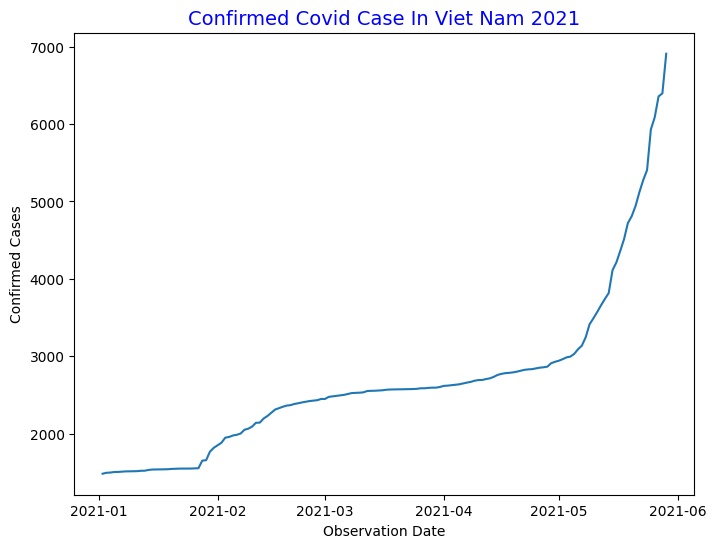

In [52]:
%%fsql
LOAD "{{root_folder}}/data/covid_19_data.parquet"
SELECT ObservationDate, Confirmed, Deaths, Country, State
WHERE Country='Vietnam' AND ObservationDate > '2021-01-01' 
OUTPUT USING plotter(x_col='ObservationDate', y_col='Confirmed', title='Confirmed Covid Case In Viet Nam 2021', x_title='Observation Date', y_title='Confirmed Cases')

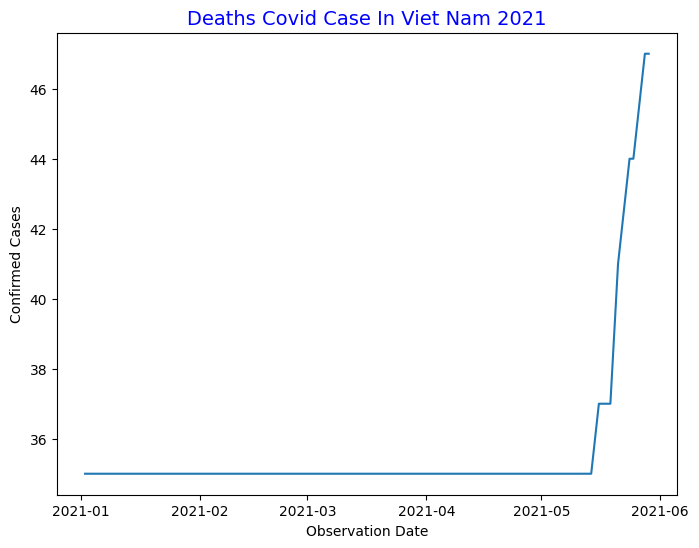

In [53]:
%%fsql
LOAD "{{root_folder}}/data/covid_19_data.parquet"
SELECT ObservationDate, Confirmed, Deaths, Country, State
WHERE Country='Vietnam' AND ObservationDate > '2021-01-01' 
OUTPUT USING plotter(x_col='ObservationDate', y_col='Deaths', title='Deaths Covid Case In Viet Nam 2021', x_title='Observation Date', y_title='Confirmed Cases')

In [54]:
def plots(df:pd.DataFrame, x_col:str, y_col:str, y_col2:str, 
          title:str, x_title:str, y_title:str, y_title2:str) -> None:
    f, ax = plt.subplots(figsize=(8,6))
    line1, = ax.plot(df[x_col], df[y_col], color='blue')
    ax.set_ylabel(y_title, fontsize=10)
    ax.set_xlabel(x_title, fontsize=10)
   
    ax2 = ax.twinx()
    line2, = ax2.plot(df[x_col], df[y_col2], color='red')
    ax2.set_ylabel(y_title2, fontsize=10, color='red')
    plt.yticks(color='red')
    plt.legend([line1, line2], ["Số ca nhiễm", "Số ca tử vong"])
    plt.title(title, fontsize=10)
    plt.show()

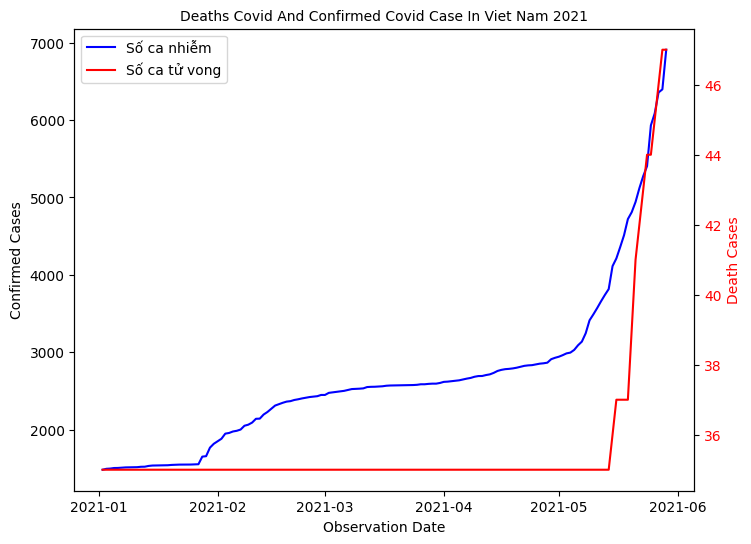

In [57]:
%%fsql
LOAD "{{root_folder}}/data/covid_19_data.parquet"
SELECT ObservationDate, Confirmed, Deaths, Country, State
WHERE Country='Vietnam' AND ObservationDate > '2021-01-01' 
OUTPUT USING plots(x_col='ObservationDate', y_col='Confirmed', y_col2='Deaths', title='Deaths Covid And Confirmed Covid Case In Viet Nam 2021',
        x_title='Observation Date', y_title='Confirmed Cases', y_title2='Death Cases')

##### ADVANCED PROCESSING

Transformer

In [64]:
df_insurance = pd.read_csv('data/insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [70]:
# schema: *, Gender:int
def make_gender(data:Iterable[Dict[str, Any]]) -> Iterable[Dict[str, Any]]:
    for row in data:
        row['Gender'] = 1 if row['sex'] == 'male' else 0
        yield row

In [71]:
%%fsql
SELECT * FROM df_insurance
TRANSFORM USING make_gender
PRINT 5 ROWS

,age:long,sex:str,bmi:double,children:long,smoker:str,region:str,charges:double,Gender:int
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [72]:
# schema: *, age_sex:str
def str_concat(data:pd.DataFrame, delimeter:str) -> pd.DataFrame:
    data['age_sex'] = data['age'].astype(str) + delimeter + data['sex']
    return data

In [74]:
%%fsql
SELECT * FROM df_insurance
TRANSFORM USING str_concat(delimeter='_')
PRINT 5 ROWS

,age:long,sex:str,bmi:double,children:long,smoker:str,region:str,charges:double,age_sex:str
0,19,female,27.900,0,yes,southwest,16884.92400,19_female
1,18,male,33.770,1,no,southeast,1725.55230,18_male
2,28,male,33.000,3,no,southeast,4449.46200,28_male
3,33,male,22.705,0,no,northwest,21984.47061,33_male
4,32,male,28.880,0,no,northwest,3866.85520,32_male


Processor

In [75]:
def concat(df1:pd.DataFrame, df2:pd.DataFrame) -> pd.DataFrame:
    return pd.concat([df1, df2]).reset_index(drop=True)

In [76]:
%%fsql
a = CREATE [[1, 'one'], [2, 'two']] SCHEMA a:int, b:str
b = CREATE [[3, 'three'], [4, 'four']] SCHEMA a:int, b:str
PROCESS a, b USING concat
PRINT

,a:int,b:str
0,1,one
1,2,two
2,3,three
3,4,four


In [95]:
df_red = pd.read_csv('data/winequality-red.csv', sep=',')
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [96]:
df_white = pd.read_csv('data/winequality-white.csv', sep=',')
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [97]:
%%fsql
PROCESS df_red, df_white USING concat
YIELD DATAFRAME AS df_red_white

In [98]:
df_red_white_pandas = df_red_white.as_pandas()
df_red_white_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [99]:
df_red_white_pandas.to_csv('data/red-white-wine-quality.csv', index=False)

In [100]:
df_red_white_pandas = pd.read_csv('data/red-white-wine-quality.csv')
df_red_white_pandas.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Sampling

In [109]:
df = sns.load_dataset('titanic')
columns = ['class', 'deck']
for col in columns:
    df[col] = df[col].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         891 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [110]:
%%fsql
df2 = SAMPLE 5 ROWS SEED 42 FROM df
PRINT df2

,survived:long,pclass:long,sex:str,age:double,sibsp:long,parch:long,fare:double,embarked:str,class:str,who:str,adult_male:bool,deck:str,embark_town:str,alive:str,alone:bool
0,1,3,male,NaN,1,1,15.2458,C,Third,man,True,nan,Cherbourg,yes,False
1,0,2,male,31.0,0,0,10.5000,S,Second,man,True,nan,Southampton,no,True
2,0,3,male,20.0,0,0,7.9250,S,Third,man,True,nan,Southampton,no,True
3,1,2,female,6.0,0,1,33.0000,S,Second,child,False,nan,Southampton,yes,False
4,1,3,female,14.0,1,0,11.2417,C,Third,child,False,nan,Cherbourg,yes,False


In [111]:
%%fsql
df_percent = SAMPLE 5 PERCENT SEED 42 FROM df
PRINT df_percent

,survived:long,pclass:long,sex:str,age:double,sibsp:long,parch:long,fare:double,embarked:str,class:str,who:str,adult_male:bool,deck:str,embark_town:str,alive:str,alone:bool
0,1,3,male,NaN,1,1,15.2458,C,Third,man,True,nan,Cherbourg,yes,False
1,0,2,male,31.0,0,0,10.5000,S,Second,man,True,nan,Southampton,no,True
2,0,3,male,20.0,0,0,7.9250,S,Third,man,True,nan,Southampton,no,True
3,1,2,female,6.0,0,1,33.0000,S,Second,child,False,nan,Southampton,yes,False
4,1,3,female,14.0,1,0,11.2417,C,Third,child,False,nan,Cherbourg,yes,False
5,1,1,female,26.0,0,0,78.8500,S,First,woman,False,nan,Southampton,yes,True
6,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,nan,Queenstown,yes,True
7,0,3,male,16.0,2,0,18.0000,S,Third,man,True,nan,Southampton,no,False
8,1,3,female,16.0,0,0,7.7500,Q,Third,woman,False,nan,Queenstown,yes,True
9,1,1,female,19.0,0,2,26.2833,S,First,woman,False,D,Southampton,yes,False


In [113]:
%%fsql
df_percent = SAMPLE REPLACE 5 PERCENT SEED 42 FROM df
PRINT df_percent

,survived:long,pclass:long,sex:str,age:double,sibsp:long,parch:long,fare:double,embarked:str,class:str,who:str,adult_male:bool,deck:str,embark_town:str,alive:str,alone:bool
0,0,1,male,21.0,0,1,77.2875,S,First,man,True,D,Southampton,no,False
1,1,1,female,14.0,1,2,120.0000,S,First,child,False,B,Southampton,yes,False
2,0,3,male,41.0,2,0,14.1083,S,Third,man,True,nan,Southampton,no,False
3,0,1,male,NaN,0,0,31.0000,S,First,man,True,nan,Southampton,no,True
4,1,3,female,21.0,0,0,7.6500,S,Third,woman,False,nan,Southampton,yes,True
5,0,3,female,16.0,5,2,46.9000,S,Third,woman,False,nan,Southampton,no,False
6,1,1,female,18.0,1,0,227.5250,C,First,woman,False,C,Cherbourg,yes,False
7,0,2,male,35.0,0,0,26.0000,S,Second,man,True,nan,Southampton,no,True
8,0,3,male,35.0,0,0,8.0500,S,Third,man,True,nan,Southampton,no,True
9,0,3,male,NaN,0,0,8.0500,S,Third,man,True,nan,Southampton,no,True


In [114]:
df5 = pd.DataFrame({
    'name': ['John', 'Marry', 'Tom', 'John', 'Marry'],
    'age': [26, 22, 28, 26, 22],
})

In [122]:
%%fsql
df_sample = SAMPLE 2 ROWS SEED 2 FROM df5
df_sample_replcae = SAMPLE REPLACE 2 ROWS SEED 2 FROM df5
PRINT df_sample
PRINT df_sample_replcaeb

,name:str,age:long
0,Tom,28
1,Marry,22


,name:str,age:long
0,John,26
1,John,26


In [3]:
import spacy

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Sentence to be parsed
sentence = "He books me the morning flight"

# Parse the sentence
doc = nlp(sentence)

# Print the dependency tree
for token in doc:
    print(f"{token.text}: {token.dep_} --> {token.head.text}")

He: nsubj --> books
books: ROOT --> books
me: dobj --> books
the: det --> flight
morning: compound --> flight
flight: npadvmod --> books


In [ ]:
# Natural Language Toolkit: Interface to MaltParser
#
# Author: Dan Garrette <dhgarrette@gmail.com>
# Contributor: Liling Tan, Mustufain, osamamukhtar11
#
# Copyright (C) 2001-2023 NLTK Project
# URL: <https://www.nltk.org/>
# For license information, see LICENSE.TXT

import inspect
import os
import subprocess
import sys
import tempfile

from nltk.data import ZipFilePathPointer
from nltk.internals import find_dir, find_file, find_jars_within_path
from nltk.parse.api import ParserI
from nltk.parse.dependencygraph import DependencyGraph
from nltk.parse.util import taggedsents_to_conll


[docs]def malt_regex_tagger():
    from nltk.tag import RegexpTagger

    _tagger = RegexpTagger(
        [
            (r"\.$", "."),
            (r"\,$", ","),
            (r"\?$", "?"),  # fullstop, comma, Qmark
            (r"\($", "("),
            (r"\)$", ")"),  # round brackets
            (r"\[$", "["),
            (r"\]$", "]"),  # square brackets
            (r"^-?[0-9]+(\.[0-9]+)?$", "CD"),  # cardinal numbers
            (r"(The|the|A|a|An|an)$", "DT"),  # articles
            (r"(He|he|She|she|It|it|I|me|Me|You|you)$", "PRP"),  # pronouns
            (r"(His|his|Her|her|Its|its)$", "PRP$"),  # possessive
            (r"(my|Your|your|Yours|yours)$", "PRP$"),  # possessive
            (r"(on|On|in|In|at|At|since|Since)$", "IN"),  # time prepopsitions
            (r"(for|For|ago|Ago|before|Before)$", "IN"),  # time prepopsitions
            (r"(till|Till|until|Until)$", "IN"),  # time prepopsitions
            (r"(by|By|beside|Beside)$", "IN"),  # space prepopsitions
            (r"(under|Under|below|Below)$", "IN"),  # space prepopsitions
            (r"(over|Over|above|Above)$", "IN"),  # space prepopsitions
            (r"(across|Across|through|Through)$", "IN"),  # space prepopsitions
            (r"(into|Into|towards|Towards)$", "IN"),  # space prepopsitions
            (r"(onto|Onto|from|From)$", "IN"),  # space prepopsitions
            (r".*able$", "JJ"),  # adjectives
            (r".*ness$", "NN"),  # nouns formed from adjectives
            (r".*ly$", "RB"),  # adverbs
            (r".*s$", "NNS"),  # plural nouns
            (r".*ing$", "VBG"),  # gerunds
            (r".*ed$", "VBD"),  # past tense verbs
            (r".*", "NN"),  # nouns (default)
        ]
    )
    return _tagger.tag



[docs]def find_maltparser(parser_dirname):
    """
    A module to find MaltParser .jar file and its dependencies.
    """
    if os.path.exists(parser_dirname):  # If a full path is given.
        _malt_dir = parser_dirname
    else:  # Try to find path to maltparser directory in environment variables.
        _malt_dir = find_dir(parser_dirname, env_vars=("MALT_PARSER",))
    # Checks that that the found directory contains all the necessary .jar
    malt_dependencies = ["", "", ""]
    _malt_jars = set(find_jars_within_path(_malt_dir))
    _jars = {os.path.split(jar)[1] for jar in _malt_jars}
    malt_dependencies = {"log4j.jar", "libsvm.jar", "liblinear-1.8.jar"}

    assert malt_dependencies.issubset(_jars)
    assert any(
        filter(lambda i: i.startswith("maltparser-") and i.endswith(".jar"), _jars)
    )
    return list(_malt_jars)



[docs]def find_malt_model(model_filename):
    """
    A module to find pre-trained MaltParser model.
    """
    if model_filename is None:
        return "malt_temp.mco"
    elif os.path.exists(model_filename):  # If a full path is given.
        return model_filename
    else:  # Try to find path to malt model in environment variables.
        return find_file(model_filename, env_vars=("MALT_MODEL",), verbose=False)



[docs]class MaltParser(ParserI):
    """
    A class for dependency parsing with MaltParser. The input is the paths to:
    - (optionally) a maltparser directory
    - (optionally) the path to a pre-trained MaltParser .mco model file
    - (optionally) the tagger to use for POS tagging before parsing
    - (optionally) additional Java arguments

    Example:
        >>> from nltk.parse import malt
        >>> # With MALT_PARSER and MALT_MODEL environment set.
        >>> mp = malt.MaltParser(model_filename='engmalt.linear-1.7.mco') # doctest: +SKIP
        >>> mp.parse_one('I shot an elephant in my pajamas .'.split()).tree() # doctest: +SKIP
        (shot I (elephant an) (in (pajamas my)) .)
        >>> # Without MALT_PARSER and MALT_MODEL environment.
        >>> mp = malt.MaltParser('/home/user/maltparser-1.9.2/', '/home/user/engmalt.linear-1.7.mco') # doctest: +SKIP
        >>> mp.parse_one('I shot an elephant in my pajamas .'.split()).tree() # doctest: +SKIP
        (shot I (elephant an) (in (pajamas my)) .)
    """

[docs]    def __init__(
        self,
        parser_dirname="",
        model_filename=None,
        tagger=None,
        additional_java_args=None,
    ):
        """
        An interface for parsing with the Malt Parser.

        :param parser_dirname: The path to the maltparser directory that
            contains the maltparser-1.x.jar
        :type parser_dirname: str
        :param model_filename: The name of the pre-trained model with .mco file
            extension. If provided, training will not be required.
            (see http://www.maltparser.org/mco/mco.html and
            see http://www.patful.com/chalk/node/185)
        :type model_filename: str
        :param tagger: The tagger used to POS tag the raw string before
            formatting to CONLL format. It should behave like `nltk.pos_tag`
        :type tagger: function
        :param additional_java_args: This is the additional Java arguments that
            one can use when calling Maltparser, usually this is the heapsize
            limits, e.g. `additional_java_args=['-Xmx1024m']`
            (see https://goo.gl/mpDBvQ)
        :type additional_java_args: list
        """

        # Find all the necessary jar files for MaltParser.
        self.malt_jars = find_maltparser(parser_dirname)
        # Initialize additional java arguments.
        self.additional_java_args = (
            additional_java_args if additional_java_args is not None else []
        )
        # Initialize model.
        self.model = find_malt_model(model_filename)
        self._trained = self.model != "malt_temp.mco"
        # Set the working_dir parameters i.e. `-w` from MaltParser's option.
        self.working_dir = tempfile.gettempdir()
        # Initialize POS tagger.
        self.tagger = tagger if tagger is not None else malt_regex_tagger()


[docs]    def parse_tagged_sents(self, sentences, verbose=False, top_relation_label="null"):
        """
        Use MaltParser to parse multiple POS tagged sentences. Takes multiple
        sentences where each sentence is a list of (word, tag) tuples.
        The sentences must have already been tokenized and tagged.

        :param sentences: Input sentences to parse
        :type sentence: list(list(tuple(str, str)))
        :return: iter(iter(``DependencyGraph``)) the dependency graph
            representation of each sentence
        """
        if not self._trained:
            raise Exception("Parser has not been trained. Call train() first.")

        with tempfile.NamedTemporaryFile(
            prefix="malt_input.conll.", dir=self.working_dir, mode="w", delete=False
        ) as input_file:
            with tempfile.NamedTemporaryFile(
                prefix="malt_output.conll.",
                dir=self.working_dir,
                mode="w",
                delete=False,
            ) as output_file:
                # Convert list of sentences to CONLL format.
                for line in taggedsents_to_conll(sentences):
                    input_file.write(str(line))
                input_file.close()

                # Generate command to run maltparser.
                cmd = self.generate_malt_command(
                    input_file.name, output_file.name, mode="parse"
                )

                # This is a maltparser quirk, it needs to be run
                # where the model file is. otherwise it goes into an awkward
                # missing .jars or strange -w working_dir problem.
                _current_path = os.getcwd()  # Remembers the current path.
                try:  # Change to modelfile path
                    os.chdir(os.path.split(self.model)[0])
                except:
                    pass
                ret = self._execute(cmd, verbose)  # Run command.
                os.chdir(_current_path)  # Change back to current path.

                if ret != 0:
                    raise Exception(
                        "MaltParser parsing (%s) failed with exit "
                        "code %d" % (" ".join(cmd), ret)
                    )

                # Must return iter(iter(Tree))
                with open(output_file.name) as infile:
                    for tree_str in infile.read().split("\n\n"):
                        yield (
                            iter(
                                [
                                    DependencyGraph(
                                        tree_str, top_relation_label=top_relation_label
                                    )
                                ]
                            )
                        )

        os.remove(input_file.name)
        os.remove(output_file.name)


[docs]    def parse_sents(self, sentences, verbose=False, top_relation_label="null"):
        """
        Use MaltParser to parse multiple sentences.
        Takes a list of sentences, where each sentence is a list of words.
        Each sentence will be automatically tagged with this
        MaltParser instance's tagger.

        :param sentences: Input sentences to parse
        :type sentence: list(list(str))
        :return: iter(DependencyGraph)
        """
        tagged_sentences = (self.tagger(sentence) for sentence in sentences)
        return self.parse_tagged_sents(
            tagged_sentences, verbose, top_relation_label=top_relation_label
        )


[docs]    def generate_malt_command(self, inputfilename, outputfilename=None, mode=None):
        """
        This function generates the maltparser command use at the terminal.

        :param inputfilename: path to the input file
        :type inputfilename: str
        :param outputfilename: path to the output file
        :type outputfilename: str
        """

        cmd = ["java"]
        cmd += self.additional_java_args  # Adds additional java arguments
        # Joins classpaths with ";" if on Windows and on Linux/Mac use ":"
        classpaths_separator = ";" if sys.platform.startswith("win") else ":"
        cmd += [
            "-cp",
            classpaths_separator.join(self.malt_jars),
        ]  # Adds classpaths for jars
        cmd += ["org.maltparser.Malt"]  # Adds the main function.

        # Adds the model file.
        if os.path.exists(self.model):  # when parsing
            cmd += ["-c", os.path.split(self.model)[-1]]
        else:  # when learning
            cmd += ["-c", self.model]

        cmd += ["-i", inputfilename]
        if mode == "parse":
            cmd += ["-o", outputfilename]
        cmd += ["-m", mode]  # mode use to generate parses.
        return cmd


    @staticmethod
    def _execute(cmd, verbose=False):
        output = None if verbose else subprocess.PIPE
        p = subprocess.Popen(cmd, stdout=output, stderr=output)
        return p.wait()

[docs]    def train(self, depgraphs, verbose=False):
        """
        Train MaltParser from a list of ``DependencyGraph`` objects

        :param depgraphs: list of ``DependencyGraph`` objects for training input data
        :type depgraphs: DependencyGraph
        """

        # Write the conll_str to malt_train.conll file in /tmp/
        with tempfile.NamedTemporaryFile(
            prefix="malt_train.conll.", dir=self.working_dir, mode="w", delete=False
        ) as input_file:
            input_str = "\n".join(dg.to_conll(10) for dg in depgraphs)
            input_file.write(str(input_str))
        # Trains the model with the malt_train.conll
        self.train_from_file(input_file.name, verbose=verbose)
        # Removes the malt_train.conll once training finishes.
        os.remove(input_file.name)


[docs]    def train_from_file(self, conll_file, verbose=False):
        """
        Train MaltParser from a file
        :param conll_file: str for the filename of the training input data
        :type conll_file: str
        """

        # If conll_file is a ZipFilePathPointer,
        # then we need to do some extra massaging
        if isinstance(conll_file, ZipFilePathPointer):
            with tempfile.NamedTemporaryFile(
                prefix="malt_train.conll.", dir=self.working_dir, mode="w", delete=False
            ) as input_file:
                with conll_file.open() as conll_input_file:
                    conll_str = conll_input_file.read()
                    input_file.write(str(conll_str))
                return self.train_from_file(input_file.name, verbose=verbose)

        # Generate command to run maltparser.
        cmd = self.generate_malt_command(conll_file, mode="learn")
        ret = self._execute(cmd, verbose)
        if ret != 0:
            raise Exception(
                "MaltParser training (%s) failed with exit "
                "code %d" % (" ".join(cmd), ret)
            )
        self._trained = True



if __name__ == "__main__":
    """
    A demonstration function to show how NLTK users can use the malt parser API.

    >>> from nltk import pos_tag
    >>> assert 'MALT_PARSER' in os.environ, str(
    ... "Please set MALT_PARSER in your global environment, e.g.:\n"
    ... "$ export MALT_PARSER='/home/user/maltparser-1.9.2/'")
    >>>
    >>> assert 'MALT_MODEL' in os.environ, str(
    ... "Please set MALT_MODEL in your global environment, e.g.:\n"
    ... "$ export MALT_MODEL='/home/user/engmalt.linear-1.7.mco'")
    >>>
    >>> _dg1_str = str("1    John    _    NNP   _    _    2    SUBJ    _    _\n"
    ...             "2    sees    _    VB    _    _    0    ROOT    _    _\n"
    ...             "3    a       _    DT    _    _    4    SPEC    _    _\n"
    ...             "4    dog     _    NN    _    _    2    OBJ     _    _\n"
    ...             "5    .     _    .    _    _    2    PUNCT     _    _\n")
    >>>
    >>>
    >>> _dg2_str  = str("1    John    _    NNP   _    _    2    SUBJ    _    _\n"
    ...             "2    walks   _    VB    _    _    0    ROOT    _    _\n"
    ...             "3    .     _    .    _    _    2    PUNCT     _    _\n")
    >>> dg1 = DependencyGraph(_dg1_str)
    >>> dg2 = DependencyGraph(_dg2_str)
    >>> # Initialize a MaltParser object
    >>> mp = MaltParser()
    >>>
    >>> # Trains a model.
    >>> mp.train([dg1,dg2], verbose=False)
    >>> sent1 = ['John','sees','Mary', '.']
    >>> sent2 = ['John', 'walks', 'a', 'dog', '.']
    >>>
    >>> # Parse a single sentence.
    >>> parsed_sent1 = mp.parse_one(sent1)
    >>> parsed_sent2 = mp.parse_one(sent2)
    >>> print(parsed_sent1.tree())
    (sees John Mary .)
    >>> print(parsed_sent2.tree())
    (walks John (dog a) .)
    >>>
    >>> # Parsing multiple sentences.
    >>> sentences = [sent1,sent2]
    >>> parsed_sents = mp.parse_sents(sentences)
    >>> print(next(next(parsed_sents)).tree())
    (sees John Mary .)
    >>> print(next(next(parsed_sents)).tree())
    (walks John (dog a) .)
    >>>
    >>> # Initialize a MaltParser object with an English pre-trained model.
    >>> parser_dirname = 'maltparser-1.9.2'
    >>> model_name = 'engmalt.linear-1.7.mco'
    >>> mp = MaltParser(parser_dirname=parser_dirname, model_filename=model_name, tagger=pos_tag)
    >>> sent1 = 'I shot an elephant in my pajamas .'.split()
    >>> sent2 = 'Time flies like banana .'.split()
    >>> # Parse a single sentence.
    >>> print(mp.parse_one(sent1).tree())
    (shot I (elephant an) (in (pajamas my)) .)
    # Parsing multiple sentences
    >>> sentences = [sent1,sent2]
    >>> parsed_sents = mp.parse_sents(sentences)
    >>> print(next(next(parsed_sents)).tree())
    (shot I (elephant an) (in (pajamas my)) .)
    >>> print(next(next(parsed_sents)).tree())
    (flies Time (like banana) .)
    """

    import doctest

    doctest.testmod()